# Video Game Sales
Dataset source: https://www.kaggle.com/gregorut/videogamesales   
Note: a copy of this dataset is already included in `input_data/vgsales.csv`

## Warming-up: The Video Game Sales Dataset
### Step 1 Frequency Diagrams
  * Note: This Data grabbing step is used for both Step 1 & 2  
  
  Grabbing the data from the dataset *vgsales.csv* was relatively easy using functions already made in *mypytable.py*.
  To make this step easier in the future when I know I will need to grab more datasets I created the function `def table_set(file_name)`
  in *utils.py* which will return the data in a table.  
  #### Barchart
  To show the frequency (i.e., total number) of games per value of the given attribute I needed to create a data prep function 
  `def col_barchart_data_plot_prep(column_list)` in *utils.py* to get the frequency of each game. This returns the data in a form that can be
  used by `matplotlib.pyplot` and plotted acurately.  
  
  The function that actually plots the data is `def bar_chart(x, x_names, y)` in *plot_utils.py*.  
  * Note: This is a simple function, but a `rotation=90` was added to display the attribute names under their columns on the bar chart.
  * Note: The x and y axis titles are passed into the `bar_chart()` function as well.
  * Note: You can see in the *Year* bar chart there is a column labeled *NA* meaning there are data occurances missing the year. I chose to leave these in   the chart as I beleive it is important to keep track of the total sales, even if we are unsure of the year to get an accurate picture.

### Step 2 Pie Charts
  * Note the Data has already been stored in a table from *Step 1* so we use that same table here.
  #### Pie Chart
  A new data prep function `def pie_chart_data_prep(table, cols_to_plot)` in *utils.py* was required here in order to count the amount of occurances in each   attribute column. Once all the columns occurence values were added together, their totals were `appended` to a list to be used by a seperate 
  `def pie_chart (x_names, y)` function in *plot_utils.py*. 
  * Note: The `autopct="%1.1f%%"` line is what adds percetages to the Pie Chart.
  


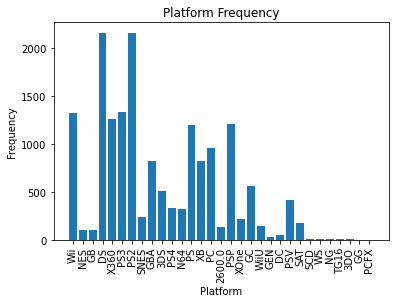

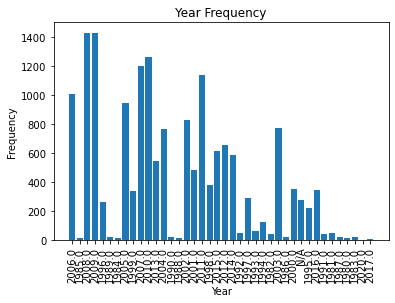

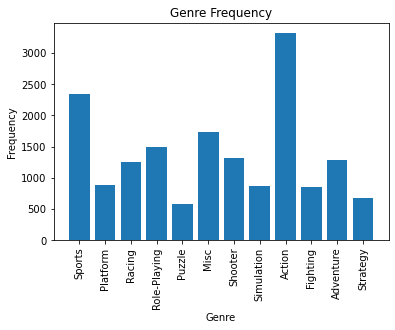

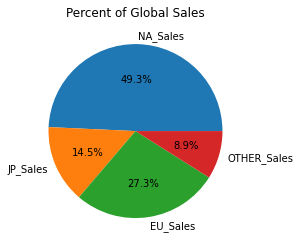

In [1]:
import utils
import plot_utils
import importlib
import mypytable 
import os
import matplotlib.pyplot as plt

importlib.reload(utils)                 # reload utils
table = utils.table_set("vgsales.csv")  # populate table data


# Platform BoxPlot
column_list = mypytable.MyPyTable.get_column(table, "Platform")
x, x_names, y = utils.col_barchart_data_plot_prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "Platform")
# Year BoxPlot
column_list = mypytable.MyPyTable.get_column(table, "Year")
x, x_names, y = utils.col_barchart_data_plot_prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "Year")
# Genre BoxPlot
column_list = mypytable.MyPyTable.get_column(table, "Genre")
x, x_names, y = utils.col_barchart_data_plot_prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "Genre")

# NA Pie Chart
cols_to_plot = ["NA_Sales", "JP_Sales", "EU_Sales", "OTHER_Sales"]
totals_list = utils.pie_chart_data_prep(table, cols_to_plot)
plot_utils.pie_chart(cols_to_plot, totals_list, "Percent of Global Sales")
